In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [67]:
df=pd.read_csv('S-AML.csv')

In [68]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
0,06:48:31,2022-08-22,43026117280,33760504369,393024.39,UK pounds,Moroccan dirham,USA,Austria,Cash Deposit,0
1,08:24:36,2022-07-16,97071361022,59256310347,442669.59,Mexican Peso,Naira,USA,USA,Credit card,0
2,03:00:59,2022-06-06,80109487516,5180723258,338377.11,Naira,UK pounds,Albania,Switzerland,Credit card,1
3,12:01:06,2022-09-16,10192509014,27587009099,172575.25,Yen,Indian rupee,Nigeria,Morocco,Cross-border,0
4,10:15:02,2022-06-10,97901350735,73390680746,474738.01,Swiss franc,Dirham,Italy,Italy,Cross-border,0


In [69]:
df['Is_laundering'].value_counts()

Is_laundering
0    153000
1    102000
Name: count, dtype: int64

In [70]:
frauds = df[df['Is_laundering'] == 1]

In [71]:
frauds

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
2,03:00:59,2022-06-06,80109487516,5180723258,338377.11,Naira,UK pounds,Albania,Switzerland,Credit card,1
5,02:36:31,2022-05-21,32017630410,22166756729,168399.93,Albanian lek,Moroccan dirham,Pakistan,Switzerland,Cross-border,1
6,00:41:55,2022-12-17,76512687382,92385216314,301203.16,Yen,Mexican Peso,Nigeria,Austria,Cross-border,1
9,12:53:27,2022-07-25,9884739810,16151942938,375686.70,Pakistani rupee,Swiss franc,Austria,USA,Cheque,1
10,10:24:46,2022-07-24,38604178126,48204699711,491020.82,Moroccan dirham,Swiss franc,Netherlands,Morocco,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...
254981,10:58:05,2022-11-04,11360457637,5152368491,347975.69,Pakistani rupee,US dollar,Japan,Turkey,Credit card,1
254982,03:08:57,2022-03-08,27002979083,3501191083,149944.32,Turkish lira,Indian rupee,Italy,Switzerland,Cash Deposit,1
254983,20:36:22,2022-07-13,2006334193,70068923932,237822.74,Pakistani rupee,Indian rupee,Turkey,France,Cross-border,1
254988,01:23:09,2022-11-26,38146626803,71988386968,331454.96,Moroccan dirham,Dirham,Albania,Netherlands,Credit card,1


In [72]:
df['Payment_currency'].unique()

array(['UK pounds', 'Mexican Peso', 'Naira', 'Yen', 'Swiss franc',
       'Albanian lek', 'Pakistani rupee', 'Moroccan dirham', 'Dirham',
       'US dollar', 'Turkish lira', 'Indian rupee', 'Euro'], dtype=object)

In [73]:
df['Received_currency'].unique()

array(['Moroccan dirham', 'Naira', 'UK pounds', 'Indian rupee', 'Dirham',
       'Mexican Peso', 'US dollar', 'Turkish lira', 'Swiss franc',
       'Albanian lek', 'Euro', 'Yen', 'Pakistani rupee'], dtype=object)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255000 entries, 0 to 254999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    255000 non-null  object 
 1   Date                    255000 non-null  object 
 2   Sender_account          255000 non-null  int64  
 3   Receiver_account        255000 non-null  int64  
 4   Amount                  255000 non-null  float64
 5   Payment_currency        255000 non-null  object 
 6   Received_currency       255000 non-null  object 
 7   Sender_bank_location    255000 non-null  object 
 8   Receiver_bank_location  255000 non-null  object 
 9   Payment_type            255000 non-null  object 
 10  Is_laundering           255000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 21.4+ MB


In [75]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
0,06:48:31,2022-08-22,43026117280,33760504369,393024.39,UK pounds,Moroccan dirham,USA,Austria,Cash Deposit,0
1,08:24:36,2022-07-16,97071361022,59256310347,442669.59,Mexican Peso,Naira,USA,USA,Credit card,0
2,03:00:59,2022-06-06,80109487516,5180723258,338377.11,Naira,UK pounds,Albania,Switzerland,Credit card,1
3,12:01:06,2022-09-16,10192509014,27587009099,172575.25,Yen,Indian rupee,Nigeria,Morocco,Cross-border,0
4,10:15:02,2022-06-10,97901350735,73390680746,474738.01,Swiss franc,Dirham,Italy,Italy,Cross-border,0


In [76]:
df.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
dtype: int64

In [77]:
df['Receiver_bank_location'].unique()

array(['Austria', 'USA', 'Switzerland', 'Morocco', 'Italy', 'India',
       'Albania', 'UK', 'Germany', 'Pakistan', 'UAE', 'Nigeria', 'Spain',
       'Mexico', 'Japan', 'Turkey', 'France', 'Netherlands'], dtype=object)

In [78]:
df['Sender_bank_location'].unique()

array(['USA', 'Albania', 'Nigeria', 'Italy', 'Pakistan', 'Spain',
       'Austria', 'Netherlands', 'Germany', 'UK', 'Switzerland', 'France',
       'Turkey', 'Morocco', 'India', 'Japan', 'UAE', 'Mexico'],
      dtype=object)

In [79]:
df['datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'], errors='coerce')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [80]:
df=df.drop(columns=['Date','Time'])

In [81]:
x=df[df['Is_laundering']==1]
x.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,datetime,year,month,day,hour
2,80109487516,5180723258,338377.11,Naira,UK pounds,Albania,Switzerland,Credit card,1,2022-06-06 03:00:59,2022,6,6,3
5,32017630410,22166756729,168399.93,Albanian lek,Moroccan dirham,Pakistan,Switzerland,Cross-border,1,2022-05-21 02:36:31,2022,5,21,2
6,76512687382,92385216314,301203.16,Yen,Mexican Peso,Nigeria,Austria,Cross-border,1,2022-12-17 00:41:55,2022,12,17,0
9,9884739810,16151942938,375686.70,Pakistani rupee,Swiss franc,Austria,USA,Cheque,1,2022-07-25 12:53:27,2022,7,25,12
10,38604178126,48204699711,491020.82,Moroccan dirham,Swiss franc,Netherlands,Morocco,ACH,1,2022-07-24 10:24:46,2022,7,24,10


In [82]:
df.isnull().sum()

Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
datetime                  0
year                      0
month                     0
day                       0
hour                      0
dtype: int64

In [83]:
categorical_cols = ['Payment_currency', 'Received_currency',
                    'Sender_bank_location', 'Receiver_bank_location',
                    'Payment_type']

In [84]:
df.describe( include='all')

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,datetime,year,month,day,hour
count,2.550000e+05,2.550000e+05,255000.000000,255000,255000,255000,255000,255000,255000.000000,255000,255000.0,255000.000000,255000.000000,255000.000000
unique,NaN,NaN,NaN,13,13,18,18,7,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mexican Peso,Albanian lek,Italy,Italy,Cross-border,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,19908,19916,14311,14427,72994,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.994761e+10,4.997039e+10,251145.634181,NaN,NaN,NaN,NaN,NaN,0.400000,2022-07-02 13:07:55.456851200,2022.0,6.527620,15.718925,11.489600
min,1.014947e+07,1.019825e+07,2001.140000,NaN,NaN,NaN,NaN,NaN,0.000000,2022-01-01 00:03:59,2022.0,1.000000,1.000000,0.000000
25%,2.497541e+10,2.508785e+10,126400.580000,NaN,NaN,NaN,NaN,NaN,0.000000,2022-04-02 12:49:01.500000,2022.0,4.000000,8.000000,5.000000
50%,4.992315e+10,4.993453e+10,251392.155000,NaN,NaN,NaN,NaN,NaN,0.000000,2022-07-02 16:35:02,2022.0,7.000000,16.000000,11.000000
75%,7.492867e+10,7.490371e+10,375448.800000,NaN,NaN,NaN,NaN,NaN,1.000000,2022-10-01 14:50:50.249999872,2022.0,10.000000,23.000000,17.000000
max,9.999969e+10,9.999979e+10,499996.040000,NaN,NaN,NaN,NaN,NaN,1.000000,2022-12-31 23:57:46,2022.0,12.000000,31.000000,23.000000


In [85]:
transactions_per_payment_type=df['Payment_type'].value_counts()
laundering_transactions_per_payment_type=df[df['Is_laundering']== 1]['Payment_type'].value_counts()
payment_summary = pd.DataFrame({'Total_Transactions':transactions_per_payment_type,'Laundering_Transactions':laundering_transactions_per_payment_type}).fillna(0)
payment_summary['Suspicious_Ratio']=payment_summary['Laundering_Transactions']/payment_summary['Total_Transactions']
print(payment_summary)

                 Total_Transactions  Laundering_Transactions  Suspicious_Ratio
Payment_type                                                                  
ACH                           54337                    25870          0.476103
Cash Deposit                  18425                     3813          0.206947
Cash Withdrawal               18108                     3697          0.204164
Cheque                        18170                     3623          0.199395
Credit card                   54796                    26171          0.477608
Cross-border                  72994                    35041          0.480053
Debit card                    18170                     3785          0.208310


In [86]:
fraud_ratio = df['Is_laundering'].mean()
fraud_ratio

np.float64(0.4)

In [87]:
sender_location=df.groupby('Sender_bank_location')['Is_laundering'].sum().sort_values(ascending=False)
print(sender_location)
receiver_location=df.groupby('Receiver_bank_location')['Is_laundering'].sum().sort_values(ascending=False)
print(receiver_location)

Sender_bank_location
Morocco        8037
Nigeria        8035
Mexico         7986
Italy          7935
Pakistan       7919
Turkey         7807
India          4638
Germany        4609
Austria        4601
UAE            4575
Switzerland    4550
France         4549
USA            4546
Netherlands    4506
UK             4503
Japan          4458
Spain          4428
Albania        4318
Name: Is_laundering, dtype: int64
Receiver_bank_location
Italy          8176
Nigeria        8041
Mexico         7980
Pakistan       7958
Morocco        7919
Turkey         7851
USA            4631
Japan          4572
Albania        4558
UK             4549
UAE            4530
Switzerland    4509
France         4509
Netherlands    4481
Spain          4461
Germany        4437
India          4421
Austria        4417
Name: Is_laundering, dtype: int64


In [88]:
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df[(df['Amount']<lower_bound) | (df['Amount']>upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Sender_account, Receiver_account, Amount, Payment_currency, Received_currency, Sender_bank_location, Receiver_bank_location, Payment_type, Is_laundering, datetime, year, month, day, hour]
Index: []


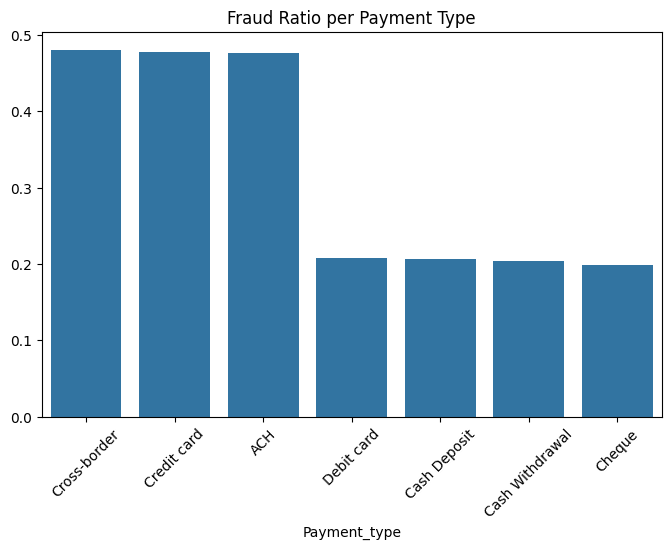

In [89]:
fraud_by_type = df.groupby("Payment_type")["Is_laundering"].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.title("Fraud Ratio per Payment Type")
plt.xticks(rotation=45)
plt.show()

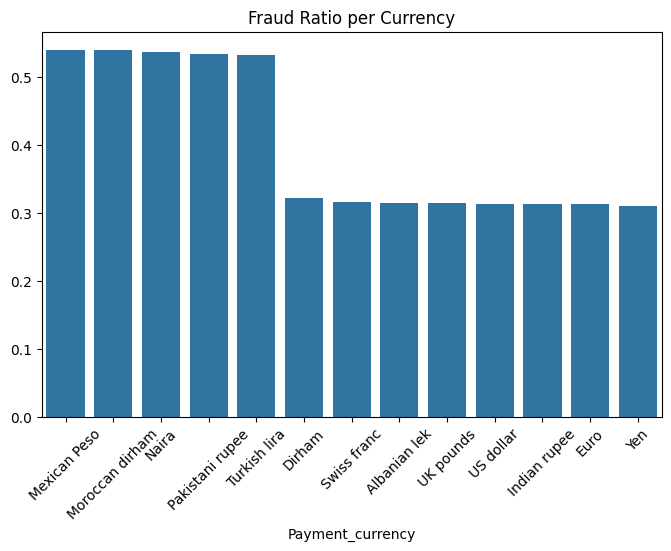

In [90]:
fraud_by_currency = df.groupby("Payment_currency")["Is_laundering"].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(x=fraud_by_currency.index, y=fraud_by_currency.values)
plt.title("Fraud Ratio per Currency")
plt.xticks(rotation=45)
plt.show()

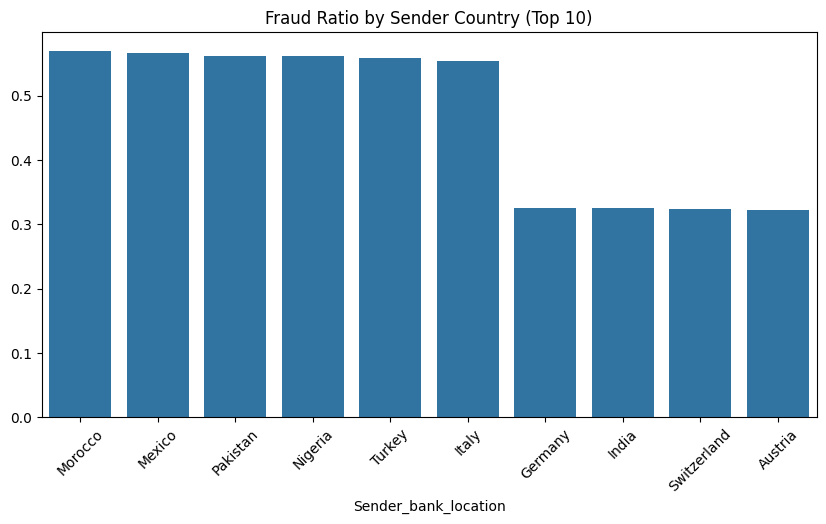

In [91]:
fraud_by_sender = df.groupby("Sender_bank_location")["Is_laundering"].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
sns.barplot(x=fraud_by_sender.index, y=fraud_by_sender.values)
plt.title("Fraud Ratio by Sender Country (Top 10)")
plt.xticks(rotation=45)
plt.show()

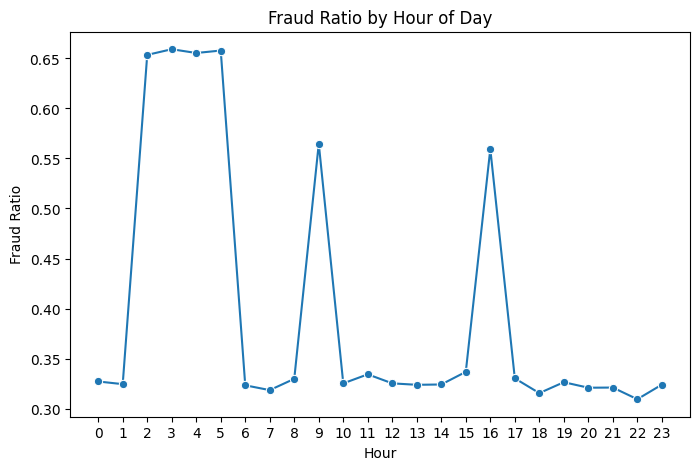

In [92]:

fraud_by_hour = df.groupby("hour")["Is_laundering"].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker="o")
plt.title("Fraud Ratio by Hour of Day")
plt.xlabel("Hour")
plt.xticks(range(24))
plt.ylabel("Fraud Ratio")
plt.show()

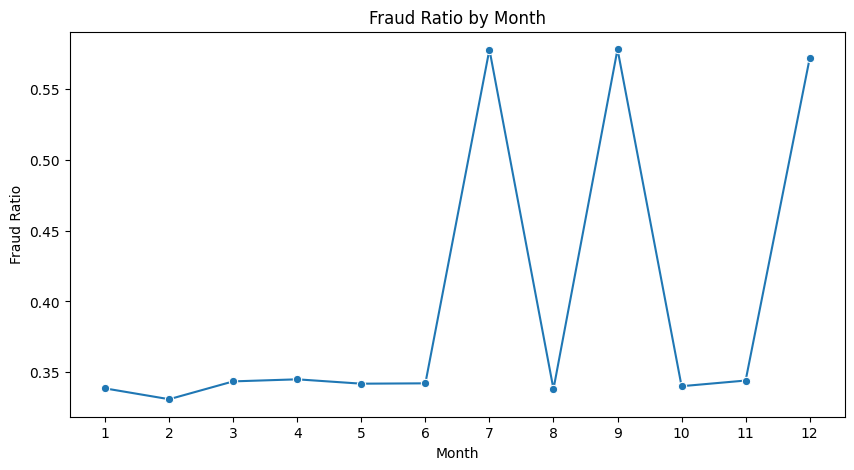

In [93]:
fraud_per_month = df.groupby('month')['Is_laundering'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=fraud_per_month.index, y=fraud_per_month.values, marker="o")
plt.title("Fraud Ratio by Month")
plt.xlabel("Month")
plt.ylabel("Fraud Ratio")
plt.xticks(range(1, 13))
plt.show()

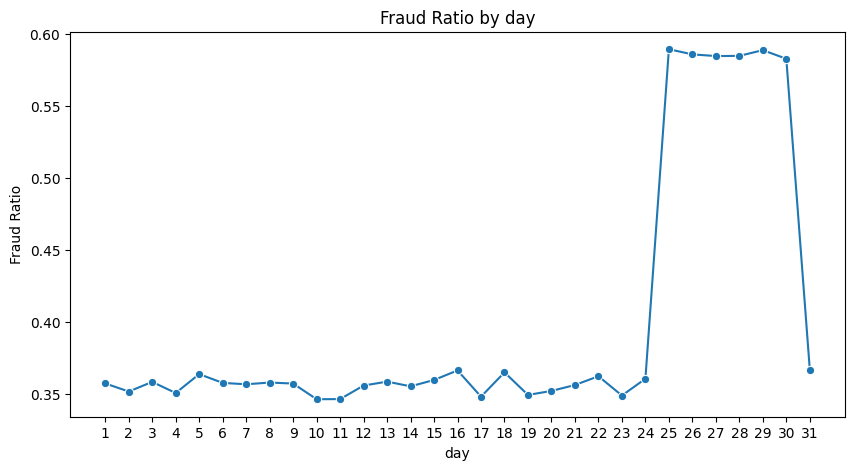

In [94]:
fraud_per_month = df.groupby('day')['Is_laundering'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=fraud_per_month.index, y=fraud_per_month.values, marker="o")
plt.title("Fraud Ratio by day")
plt.xlabel("day")
plt.ylabel("Fraud Ratio")
plt.xticks(range(1, 32))
plt.show()

   year  Is_laundering
0  2022            0.4


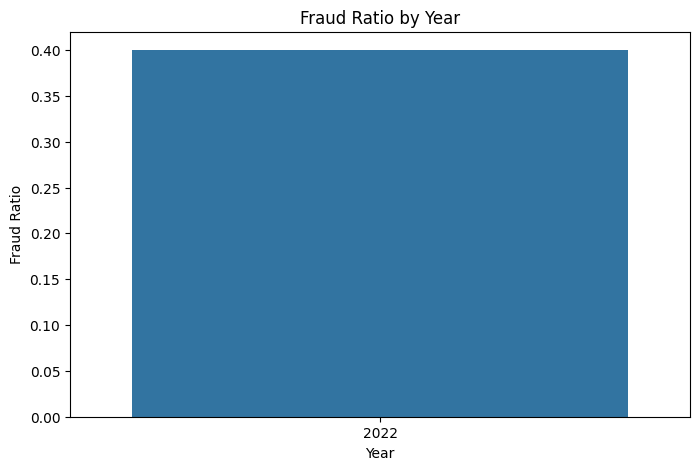

In [95]:
fraud_per_year = df.groupby('year')['Is_laundering'].mean().reset_index()
print(fraud_per_year)
plt.figure(figsize=(8,5))
sns.barplot(x='year', y='Is_laundering', data=fraud_per_year)

plt.title("Fraud Ratio by Year")
plt.xlabel("Year")
plt.ylabel("Fraud Ratio")
plt.show()



Amount_bucket
0    0.319284
1    0.480567
Name: Is_laundering, dtype: float64


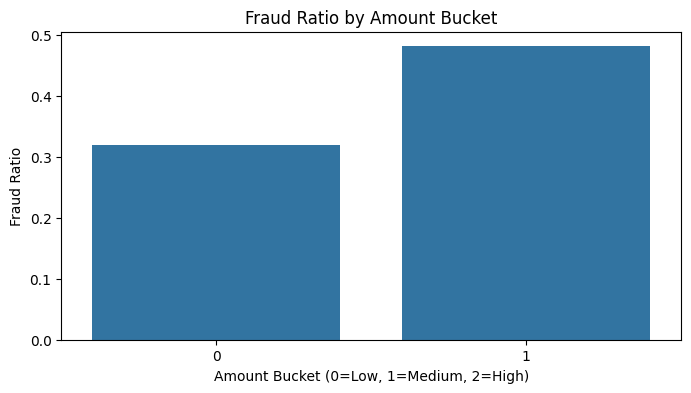

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


bins = [0, df['Amount'].mean(), df['Amount'].max()]
labels = [0, 1]  


df['Amount_bucket'] = pd.cut(df['Amount'], bins=bins, labels=labels, include_lowest=True)


df['Amount_bucket'] = df['Amount_bucket'].astype(int)
fraud_by_bucket = df.groupby("Amount_bucket")["Is_laundering"].mean()
print(fraud_by_bucket)

plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_by_bucket.index, y=fraud_by_bucket.values)
plt.title("Fraud Ratio by Amount Bucket")
plt.xlabel("Amount Bucket (0=Low, 1=Medium, 2=High)")
plt.ylabel("Fraud Ratio")
plt.show()


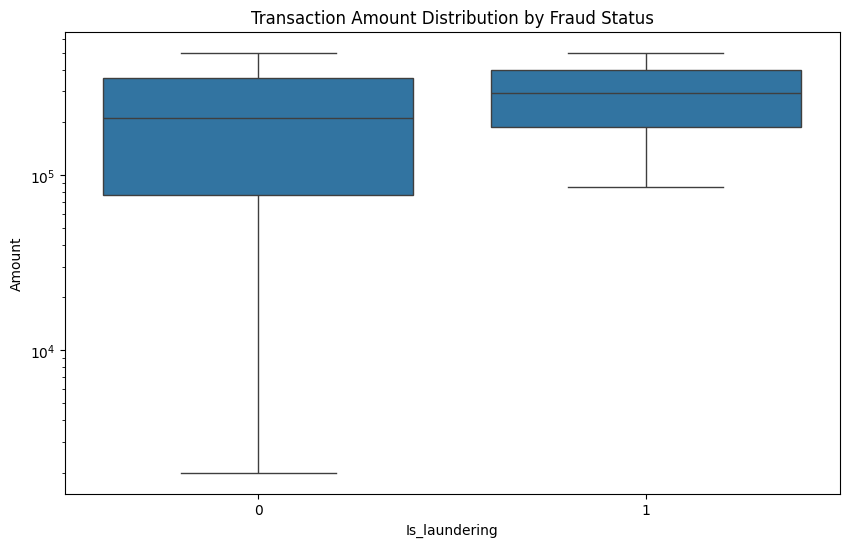

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Is_laundering', y='Amount', data=df)
plt.yscale('log')
plt.title("Transaction Amount Distribution by Fraud Status")
plt.show()

In [98]:
df['is_crossborder'] = (df['Sender_bank_location'] != df['Receiver_bank_location']).astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255000 entries, 0 to 254999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Sender_account          255000 non-null  int64         
 1   Receiver_account        255000 non-null  int64         
 2   Amount                  255000 non-null  float64       
 3   Payment_currency        255000 non-null  object        
 4   Received_currency       255000 non-null  object        
 5   Sender_bank_location    255000 non-null  object        
 6   Receiver_bank_location  255000 non-null  object        
 7   Payment_type            255000 non-null  object        
 8   Is_laundering           255000 non-null  int64         
 9   datetime                255000 non-null  datetime64[ns]
 10  year                    255000 non-null  int32         
 11  month                   255000 non-null  int32         
 12  day                     255000

In [100]:
customer_avg = df.groupby('Sender_account')['Amount'].mean().reset_index()

customer_avg.rename(columns={'Amount':'avg_amount_per_customer'}, inplace=True)
df = df.merge(customer_avg, on='Sender_account', how='left')
df['amount_ratio'] = df['Amount'] / df['avg_amount_per_customer']

In [101]:

from sklearn.preprocessing import LabelEncoder
df_for_cor=df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_for_cor[col] = le.fit_transform(df_for_cor[col].astype(str))


In [102]:
df

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,datetime,year,month,day,hour,Amount_bucket,is_crossborder,avg_amount_per_customer,amount_ratio
0,43026117280,33760504369,393024.39,UK pounds,Moroccan dirham,USA,Austria,Cash Deposit,0,2022-08-22 06:48:31,2022,8,22,6,1,1,393024.39,1.0
1,97071361022,59256310347,442669.59,Mexican Peso,Naira,USA,USA,Credit card,0,2022-07-16 08:24:36,2022,7,16,8,1,0,442669.59,1.0
2,80109487516,5180723258,338377.11,Naira,UK pounds,Albania,Switzerland,Credit card,1,2022-06-06 03:00:59,2022,6,6,3,1,1,338377.11,1.0
3,10192509014,27587009099,172575.25,Yen,Indian rupee,Nigeria,Morocco,Cross-border,0,2022-09-16 12:01:06,2022,9,16,12,0,1,172575.25,1.0
4,97901350735,73390680746,474738.01,Swiss franc,Dirham,Italy,Italy,Cross-border,0,2022-06-10 10:15:02,2022,6,10,10,1,0,474738.01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254995,24746695109,38664666955,113573.29,Euro,Moroccan dirham,Morocco,USA,Cash Deposit,0,2022-10-09 22:05:51,2022,10,9,22,0,1,113573.29,1.0
254996,77318463271,26596447990,294288.57,Mexican Peso,UK pounds,France,Austria,ACH,0,2022-11-10 09:39:25,2022,11,10,9,1,1,294288.57,1.0
254997,29442575870,98547411623,416064.92,Turkish lira,US dollar,Switzerland,India,Credit card,0,2022-08-16 06:01:22,2022,8,16,6,1,1,416064.92,1.0
254998,43960841550,61711760730,239602.29,Yen,Indian rupee,Japan,Morocco,Cross-border,0,2022-04-19 18:48:32,2022,4,19,18,0,1,239602.29,1.0


In [103]:

corr_with_target = df_for_cor.corr()['Is_laundering'].sort_values(ascending=False)

print(corr_with_target)


Is_laundering              1.000000e+00
avg_amount_per_customer    2.355539e-01
Amount                     2.355538e-01
Amount_bucket              1.646090e-01
day                        1.209428e-01
datetime                   1.089790e-01
month                      9.972620e-02
is_crossborder             3.733599e-02
Receiver_bank_location     2.429811e-02
Sender_bank_location       2.073692e-02
Payment_type               1.452865e-02
Received_currency          1.178576e-02
Payment_currency           5.842589e-03
Receiver_account           1.515229e-03
Sender_account             5.225206e-04
amount_ratio              -2.820975e-14
hour                      -1.277983e-01
year                                NaN
Name: Is_laundering, dtype: float64


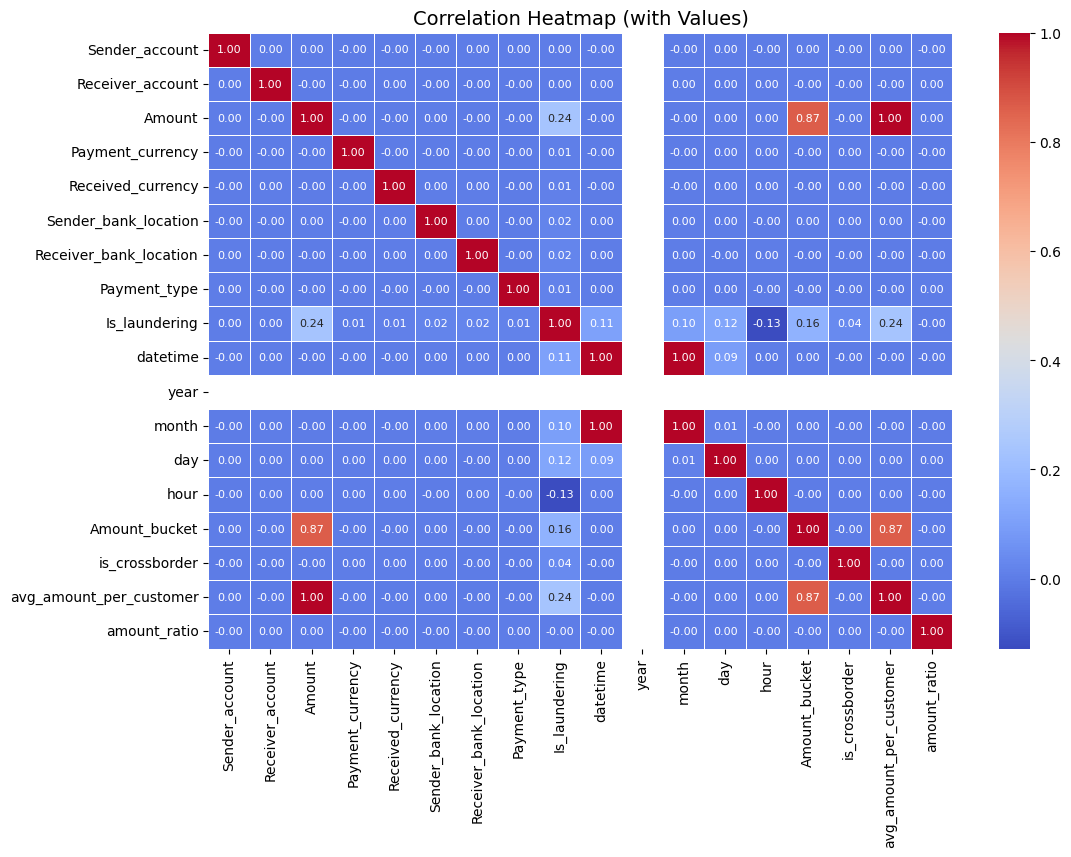

In [104]:

corr_matrix = df_for_cor.corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap (with Values)", fontsize=14)
plt.show()


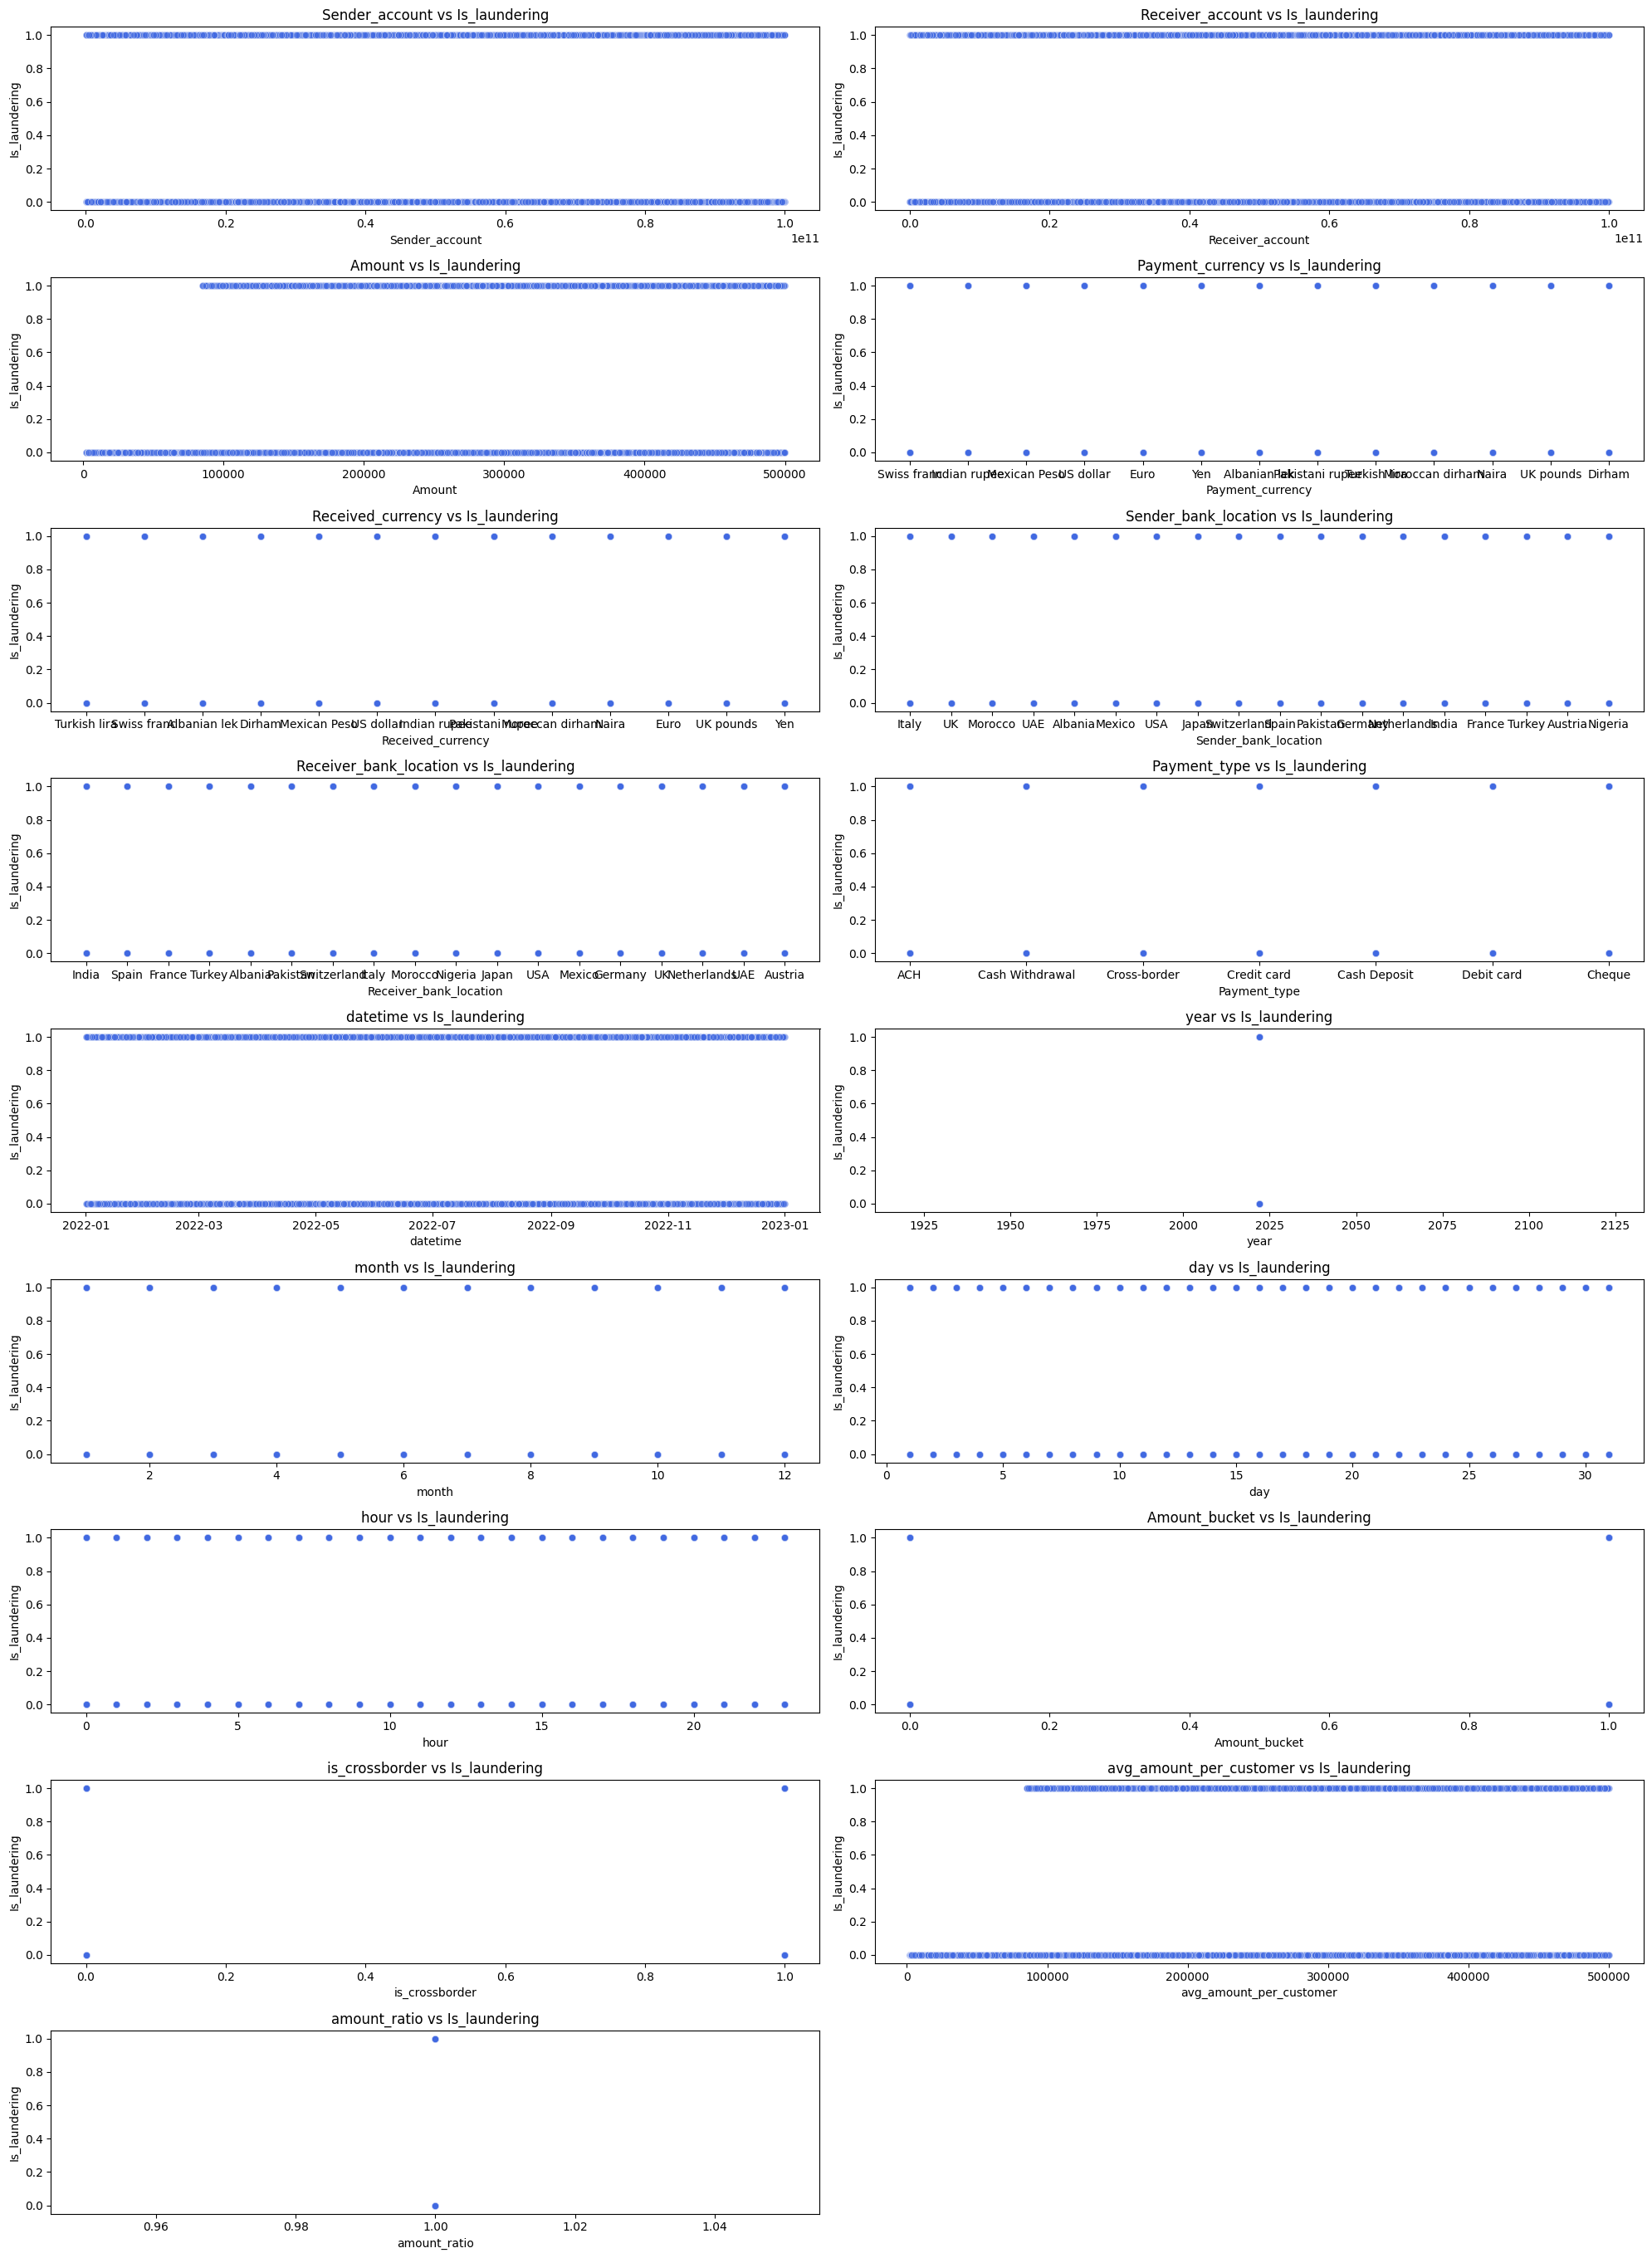

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
features = [col for col in df.columns if col != 'Is_laundering']
plt.figure(figsize=(20, len(features)*3))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, i)
    sns.scatterplot(
        data=df.sample(10000),  
        x=feature,
        y='Is_laundering',
        alpha=0.5,
        color='royalblue'
    )
    plt.title(f"{feature} vs Is_laundering", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("Is_laundering")

plt.tight_layout()
plt.show()


In [106]:

df_sampled=df

In [107]:
drop_cols = [
    'Is_laundering',
    'Sender_account',
    'Receiver_account',
    'datetime',
    'year', 'amount_ratio'
]
x = df_sampled.drop(columns=drop_cols,axis=1)


In [108]:
y=df_sampled['Is_laundering']

In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255000 entries, 0 to 254999
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Amount                   255000 non-null  float64
 1   Payment_currency         255000 non-null  object 
 2   Received_currency        255000 non-null  object 
 3   Sender_bank_location     255000 non-null  object 
 4   Receiver_bank_location   255000 non-null  object 
 5   Payment_type             255000 non-null  object 
 6   month                    255000 non-null  int32  
 7   day                      255000 non-null  int32  
 8   hour                     255000 non-null  int32  
 9   Amount_bucket            255000 non-null  int64  
 10  is_crossborder           255000 non-null  int64  
 11  avg_amount_per_customer  255000 non-null  float64
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 20.4+ MB


In [110]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 255000 entries, 0 to 254999
Series name: Is_laundering
Non-Null Count   Dtype
--------------   -----
255000 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [111]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=30, stratify=y
)



In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178500 entries, 116957 to 41011
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Amount                   178500 non-null  float64
 1   Payment_currency         178500 non-null  object 
 2   Received_currency        178500 non-null  object 
 3   Sender_bank_location     178500 non-null  object 
 4   Receiver_bank_location   178500 non-null  object 
 5   Payment_type             178500 non-null  object 
 6   month                    178500 non-null  int32  
 7   day                      178500 non-null  int32  
 8   hour                     178500 non-null  int32  
 9   Amount_bucket            178500 non-null  int64  
 10  is_crossborder           178500 non-null  int64  
 11  avg_amount_per_customer  178500 non-null  float64
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 15.7+ MB


In [113]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = [
    'Payment_currency', 'Received_currency',
    'Sender_bank_location', 'Receiver_bank_location',
    'Payment_type',
]

encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    encoders[col] = le   


In [114]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [115]:

X_train_resampled, y_train_resampled = X_train, y_train


In [116]:
y_train_resampled.value_counts()

Is_laundering
0    107100
1     71400
Name: count, dtype: int64

In [117]:
X_train_resampled.shape

(178500, 12)

In [118]:
y_train_resampled.info()

<class 'pandas.core.series.Series'>
Index: 178500 entries, 116957 to 41011
Series name: Is_laundering
Non-Null Count   Dtype
--------------   -----
178500 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


In [119]:
print(f" Number of features used in training: {X_train_resampled.shape[1]}")




 Number of features used in training: 12


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    class_weight='balanced',
    solver='lbfgs',
    max_iter=500,
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67     45900
           1       0.54      0.64      0.58     30600

    accuracy                           0.63     76500
   macro avg       0.63      0.63      0.63     76500
weighted avg       0.65      0.63      0.64     76500

[[29024 16876]
 [11135 19465]]


In [121]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_default = XGBClassifier(
    random_state=30,
    scale_pos_weight=scale_pos_weight,    
    eval_metric="logloss"               
)

xgb_default.fit(X_train, y_train)

y_pred_xgb = xgb_default.predict(X_test)

print("XGBoost Default Parameters Results:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Default Parameters Results:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     45900
           1       0.92      1.00      0.96     30600

    accuracy                           0.97     76500
   macro avg       0.96      0.97      0.96     76500
weighted avg       0.97      0.97      0.97     76500

[[43375  2525]
 [  144 30456]]


Accuracy: 0.9651111111111111


<Figure size 600x400 with 0 Axes>

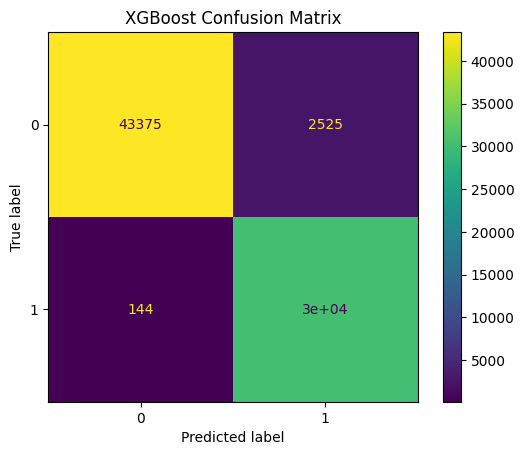

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,4))
disp.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()


In [123]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svm_model = SVC(
    kernel='rbf',          
    C=10,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

print("=== SVM Classifier Results ===")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=None),
    n_estimators=15,
    n_jobs=-1,
    random_state=42
)

bagging_model.fit(X_train_resampled, y_train_resampled)
y_pred_bagging = bagging_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("=== Bagging Classifier Results ===")
print(classification_report(y_test, y_pred_bagging))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))


=== Bagging Classifier Results ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     45900
           1       0.88      0.90      0.89     30600

    accuracy                           0.91     76500
   macro avg       0.90      0.91      0.91     76500
weighted avg       0.91      0.91      0.91     76500

Confusion Matrix:
 [[42107  3793]
 [ 3119 27481]]


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


rf_model = RandomForestClassifier(
    n_estimators=100,     
    max_depth=None,          
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)


print("=== Random Forest Classifier Results ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest Classifier Results ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45900
           1       0.86      0.86      0.86     30600

    accuracy                           0.89     76500
   macro avg       0.89      0.89      0.89     76500
weighted avg       0.89      0.89      0.89     76500

Confusion Matrix:
 [[41734  4166]
 [ 4143 26457]]


In [127]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix


lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',    
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_lgb = lgb_model.predict(X_test)

print("=== LightGBM Classifier Results ===")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 71400, number of negative: 107100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 178500, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\mohmm\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM Classifier Results ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     45900
           1       0.92      1.00      0.96     30600

    accuracy                           0.97     76500
   macro avg       0.96      0.97      0.97     76500
weighted avg       0.97      0.97      0.97     76500

Confusion Matrix:
 [[43340  2560]
 [   30 30570]]


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=250,
    random_state=42
)

mlp_model.fit(X_train_resampled, y_train_resampled)
y_pred_mlp = mlp_model.predict(X_test)

print("=== MLP Classifier Results ===")
print(classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt


models = {
    "XGB": xgb_default,
    "Logistic Regression": log_reg,
    "Bagging": bagging_model,
    "Random Forest": rf_model,
    "LightGBM": lgb_model,
    "MLP": mlp_model
}

results = []


for name, model in models.items():
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

df_results = pd.DataFrame(results)
print(df_results)


df_results.set_index("Model").plot(kind="bar", figsize=(12,6))
plt.title("Model Evaluation Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


NameError: name 'mlp_model' is not defined

c:\Users\mohmm\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


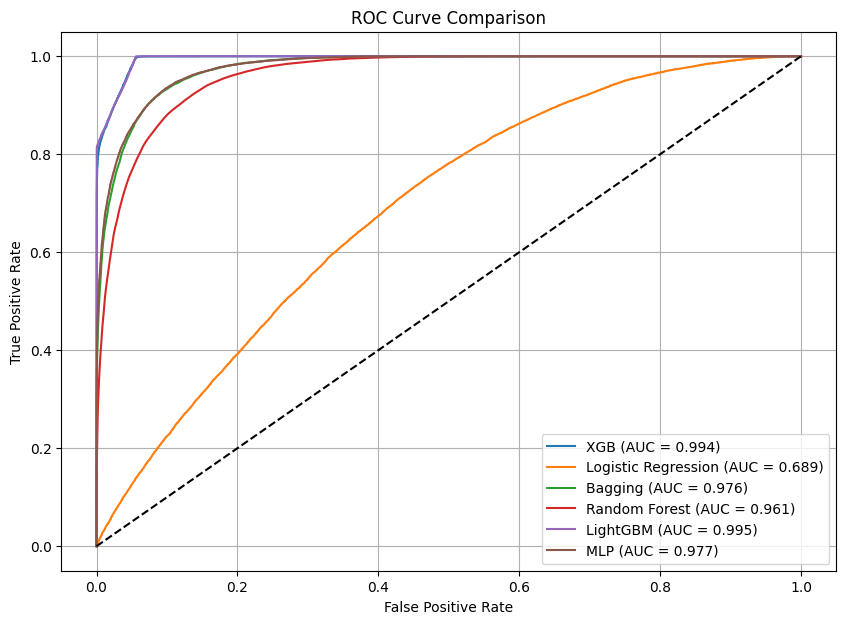

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for name, model in models.items():
   
    y_proba = model.predict_proba(X_test)[:, 1]

   
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")


plt.plot([0, 1], [0, 1], 'k--')  
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [ ]:
import pickle

In [ ]:
# import pickle


# best_lr = bagging_model 
# scaler = scaler               
# encoder = le            
              


# pipeline = {
#     "encoder": encoders,
#     "scaler": scaler,
    
#     "model": best_lr
# }


# with open("best_lr_pipeline.pkl", "wb") as f:
#     pickle.dump(pipeline, f)

# print(" best_lr_pipeline.pkl created successfully!")


 best_lr_pipeline.pkl created successfully!


In [ ]:
X_train_resampled.shape

(178500, 12)

In [133]:
import pickle


best_lr = bagging_model
scaler = scaler               
encoder = le            
              


pipeline = {
    "encoder": encoders,
    "scaler": scaler,
    
    "model": best_lr
}


with open("best_lr_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print(" best_lr_pipeline.pkl created successfully!")


 best_lr_pipeline.pkl created successfully!


# Note


we reduced the model accuracy to decrease the model size accuracy was reduced from  93 to 90 

to reincreas the accuracy please change the n_estimators paramters from 15 to 100 and accuracy will increas again 